<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Проверка-пропусков-и-изучение-средних-значений-и-стандарного-отклонения" data-toc-modified-id="Проверка-пропусков-и-изучение-средних-значений-и-стандарного-отклонения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка пропусков и изучение средних значений и стандарного отклонения</a></span></li><li><span><a href="#Сравнение-средних-значений-среди-ушедших-и-оставшихся-клиентов" data-toc-modified-id="Сравнение-средних-значений-среди-ушедших-и-оставшихся-клиентов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение средних значений среди ушедших и оставшихся клиентов</a></span></li><li><span><a href="#Построение-гистограмм-признаков" data-toc-modified-id="Построение-гистограмм-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение гистограмм признаков</a></span></li><li><span><a href="#Построение-матрицы-корреляций" data-toc-modified-id="Построение-матрицы-корреляций-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построение матрицы корреляций</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Иерархическая-кластеризация-клиентов" data-toc-modified-id="Иерархическая-кластеризация-клиентов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Иерархическая кластеризация клиентов</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Means</a></span></li><li><span><a href="#Распределение-признаков-по-кластерам" data-toc-modified-id="Распределение-признаков-по-кластерам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Распределение признаков по кластерам</a></span></li><li><span><a href="#Доля-оттока-каждого-кластера" data-toc-modified-id="Доля-оттока-каждого-кластера-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Доля оттока каждого кластера</a></span></li></ul></li><li><span><a href="#Основные-выводы-и-рекомендации" data-toc-modified-id="Основные-выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Основные выводы и рекомендации</a></span></li></ul></div>

# Исследование фитнес-центров

## Описание проекта

Целью исследования является анализ фитнес-центров "Культурист-датасаентист".
Были поставлены следующие задачи:
- загрузить данные;
- провести исследовательский анализ данных;
- построить модель прогнозирования оттока клиентов;
- cделать кластеризацию клиентов;
- сформулировать выводы и сделать базовые рекомендации по работе с клиентами.


## Загрузка данных

Импортируем необходимые библиотеки.

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score
from itertools import *
from matplotlib import pyplot as plt

Загрузим данные из файлов и выведем первые строки датасета.

In [27]:
try:
    data=pd.read_csv('/datasets/gym_churn.csv')
except:
    data=pd.read_csv('datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Набор данных включает следующие поля:
- Данные клиента за предыдущий до проверки факта оттока месяц:
 - `'gender'` — пол;
 - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
 - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент  — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - `'Phone'` — наличие контактного телефона;
 - `'Age'` — возраст;
 - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
 - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
 - `'Group_visits'` — факт посещения групповых занятий;
 - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
 - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
 - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `'Churn'` — факт оттока в текущем месяце.

## Исследовательский анализ данных (EDA)

Проведем исследовательский анализ данных.

### Проверка пропусков и изучение средних значений и стандарного отклонения

Проверим датафрейм на отсутвие пропусков.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Убедимся в отсутвии дубликатов.

In [29]:
data.duplicated().sum()

0

Изучим средние значения и стандартные отклонения величин.

In [30]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Можно сделать следующие выводы:
- мужчин и женщин практически одинаковое количество (51% на 49%);
- __48%__ клиентов-это сотрудники компаний-партнеров;
- __84%__ проживают или работают в районе местонахождения фитнес-центра;
- __30%__ посетителей использовали промо-код от знакомого;
- средняя длительность абонемента - __4.7__ месяца;
- посещали групповые занятия __41%__ клиентов;
- средний возраст- __29 лет__;
- в среднем частота посещений в неделю составляет __1.87__ занятий;
- каждый клиент в среднем принес __147__ тыс. руб., пользуясь другими услугами фитнес-центра;
- в текущем месяце фитнес-центр покинули __26.5%__ от всех месячных клиентов.

### Сравнение средних значений среди ушедших и оставшихся клиентов

Сравним, как различаются признаки у ушедших и оставшихся клиентов.

In [31]:
group_compare=data.groupby('Churn').mean()
group_compare.index=['stayed','left']
group_compare=group_compare.T
group_compare['difference,%']=round((group_compare['stayed']/group_compare['left']-1)*100,2)
group_compare.sort_values(by='difference,%',ascending=False)

,stayed,left,"difference,%"
Lifetime,4.711807,0.990575,375.66
Contract_period,5.747193,1.728558,232.48
Month_to_end_contract,5.283089,1.662582,217.76
Avg_class_frequency_current_month,2.027882,1.044546,94.14
Promo_friends,0.353522,0.183789,92.35
Group_visits,0.464103,0.268615,72.78
Partner,0.534195,0.355325,50.34
Avg_additional_charges_total,158.445715,115.082899,37.68
Avg_class_frequency_total,2.024876,1.474995,37.28
Near_Location,0.873086,0.768143,13.66


- самая большая разница в `Lifetime`:  клиенты, которые ушли, в среднем ходили лишь месяц в фитнес-центр, в то время, как у оставшихся этот показатель равен __4__;
- также ощутимая разница в длительности абонемента: срок действия у ушедших в среднем составляет __1.7__ месяцев, оставшиеся же клиенты в среднем берут абонемент на __полгода__.

### Построение гистограмм признаков

Построим гистограммы для двух групп клиентов, чтобы сравнить распределение признаков.

In [32]:
data_0=data.query('Churn==0')
data_1=data.query('Churn==1')
column=data.drop('Churn',axis=1).columns

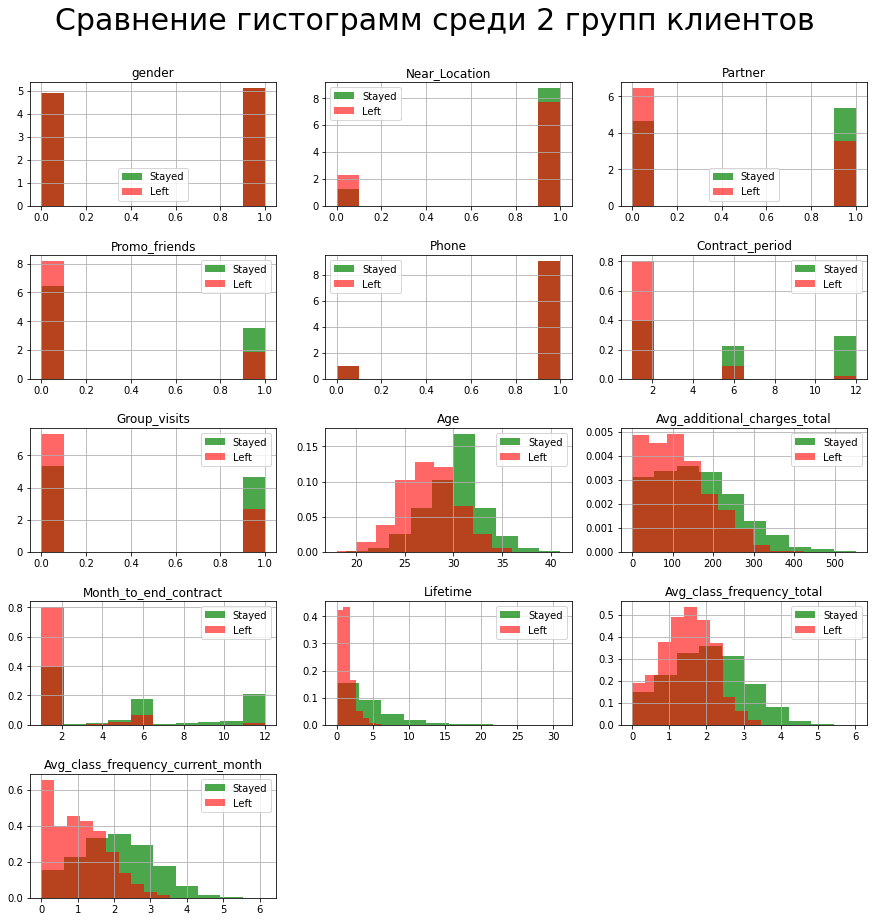

In [33]:
plt.figure(figsize=(15, 15))
for pos, col in enumerate(column,start=1):
    ax1=plt.subplot(5,3,pos)
    data_0[col].hist(ax=ax1,density=True, color='Green',alpha=0.7, label='Stayed')
    data_1[col].hist(ax=ax1,density=True,  color='Red', alpha=0.6, label='Left')
    plt.legend(loc='best')
    plt.title(col)
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Сравнение гистограмм среди 2 групп клиентов', fontsize=30, y=0.95)
plt.show()

- распределения по полу и наличию контактного номера практически идентичны;
- доля проживающих в этом же районе чуть больше среди оставшихся;
- по распределению возрастов можно сделать вывод, что оставшиеся клиенты более возрастные;
- у ушедших клиентов очень незначительна доля купленных абонементов на срок более 1 месяца;
- ушедшие клиенты реже ходят в фитнес-центр.

### Построение матрицы корреляций

Построим матрицу корреляций и исследуем признаки на взаимосвязь.

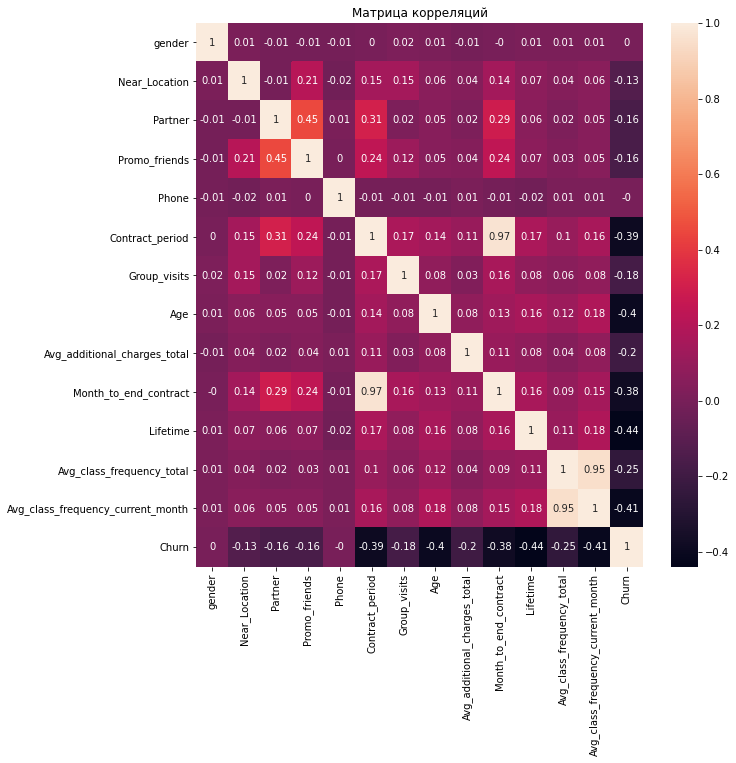

In [34]:
corr_m=round(data.corr(),2)
plt.figure(figsize=(10,10))
sns.heatmap(corr_m, annot=True)
plt.title('Матрица корреляций')
plt.show()

- сильную корреляцию имеют следущие признаки:
 - срок абонемента и время до его окончания;
 - среднее посещение и посещение в текущем месяце;
- также сразу можно заметить, что величина каждого признака имеют обратную зависимость с фактом оттока клиента (кроме пола и наличием контактного телефона.

## Построение модели прогнозирования оттока клиентов

Построим модель прогнозирования оттока клиентов. Для начала разделим данные на обучающую и валидационную выборку.

In [35]:
X=data.drop('Churn',axis=1)
y=data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Будем прогнозировать двумя моделями: логистическая регрессия и случайный лес.

In [36]:
models = [LogisticRegression(solver='liblinear', random_state=0), RandomForestClassifier(random_state=0)]

Создадим функцию для обучения моделей, прогнозирования и вывода метрик.

In [37]:
def learn_model(model, X_train, X_test, y_train, y_test):
    m=model
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))

Применим функцию для каждой модели и посмотрим на результат.

In [38]:
for i in models:
    print(i)
    learn_model(i,X_train, X_test, y_train, y_test)

LogisticRegression(random_state=0, solver='liblinear')
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
RandomForestClassifier(random_state=0)
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


Логистическая регрессия показала себя лучше по всем трем показателям.

## Кластеризация клиентов

### Иерархическая кластеризация клиентов

Сегментируем всех клиентов с помощью кластеризации. Чтобы узнать количество кластеров, воспользуемся иерархической кластеризацией.

Первым шагом стандартизируем данные.

In [39]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

Сделаем кластеризацию и выведем дендрограмму.

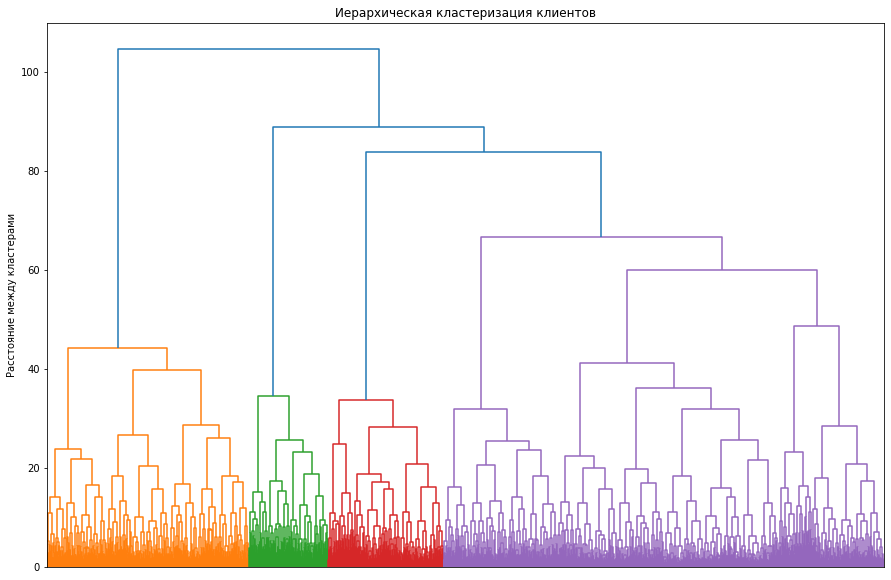

In [40]:
linked=linkage(X_sc, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.ylabel('Расстояние между кластерами')
plt.xticks([])
plt.show()

Предлагаемое моделью количество кластеров равно __5__.

### K-Means

Примем, что оптимальное количество кластеров равно __5__. Спрогнозируем их с помощью модели __K-Means__.

In [41]:
km=KMeans(n_clusters=5, random_state=0)
labels=km.fit_predict(X_sc)

Полученные результаты добавим в новый столбец.

In [42]:
data['cluster']=labels

Изучим средние значения признаков у каждого кластера.

In [43]:
data.groupby('cluster', as_index=False).mean()

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Ощутимые различия между кластерами наблюдаются в следующих признаках:
- использования промокода;
- срок абонемента;
- посещение групповых занятий;
- Lifetime;
- недельная посещаемость в текущем месяце;
- работа или проживание в районе местанахождения фитнес-центра.


### Распределение признаков по кластерам

Охарактеризуем кластеры с помощью каждого существенного признака из пункта выше, построив их распределения для каждого кластера.

In [44]:
def cluster_hist(data,cluster_n):
    data_cl=data.loc[data['cluster']==cluster_n]
    data_cl=data_cl.drop(['cluster', 'Churn'],axis=1)
    data_cl.hist(figsize=(15, 15), bins=15)
    plt.suptitle(f'Распределение признаков у {cluster_n} кластера', fontsize=25, y=0.94)
    plt.show()


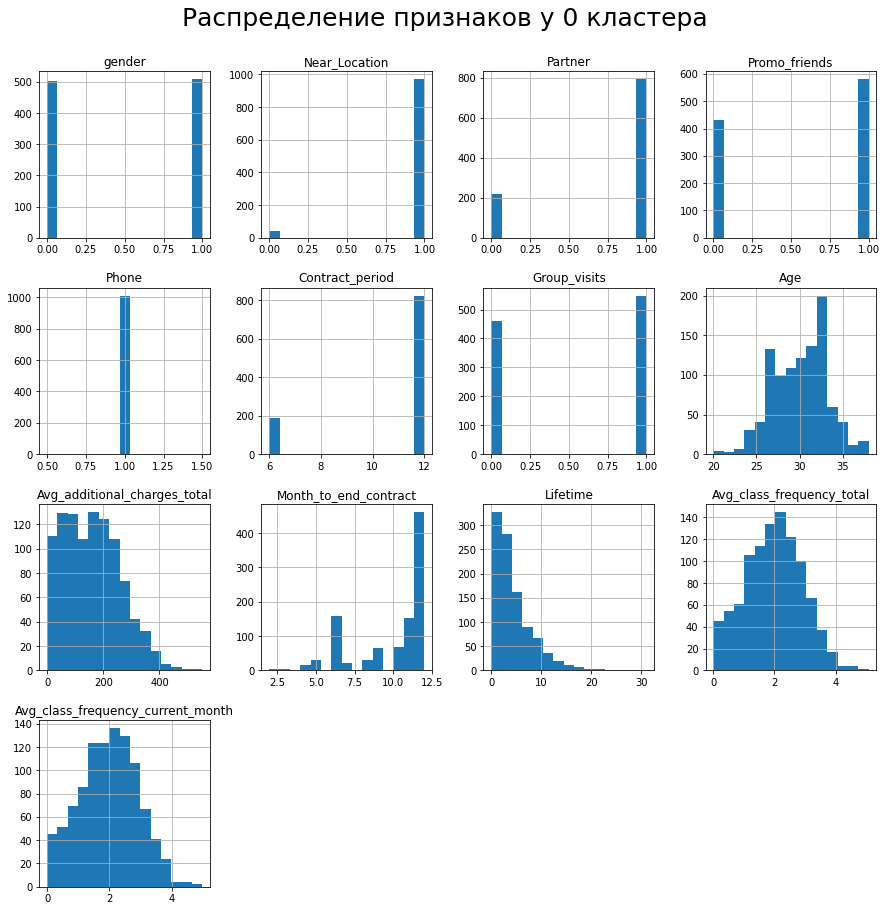

In [45]:
cluster_hist(data,0)

__Характеристика кластера:__
- промокод использован лишь у ~10% кластера;
- подавляющее большинтсво абонементов сроком на 1 месяц;
- __80%__ не ходит на групповые занятия;
- Lifetime практически весь находится в границах от 0 до 6 месяцев;
- большинство не посещало более __2__ раз в неделю в этом месяце.

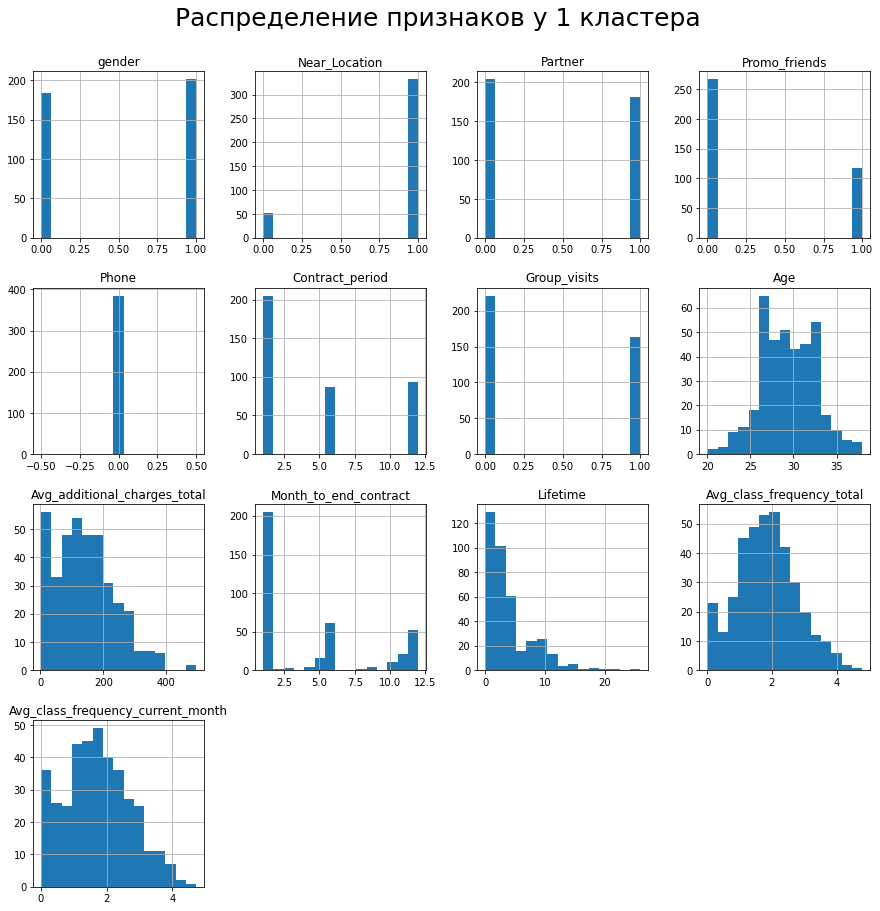

In [46]:
cluster_hist(data,1)

__Характеристика кластера:__
- промокод использован лишь у ~__10__% кластера;
- примерно у __30%__ срок абонемента 6 месяцев;
- около половины  ходит на групповые занятия;
- Lifetime у некоторых клиентов доходит до __30__ месяцев, большое количество посещает более полугода;
- большинство посещало от __2__ до __4__ раз в неделю в этом месяце.

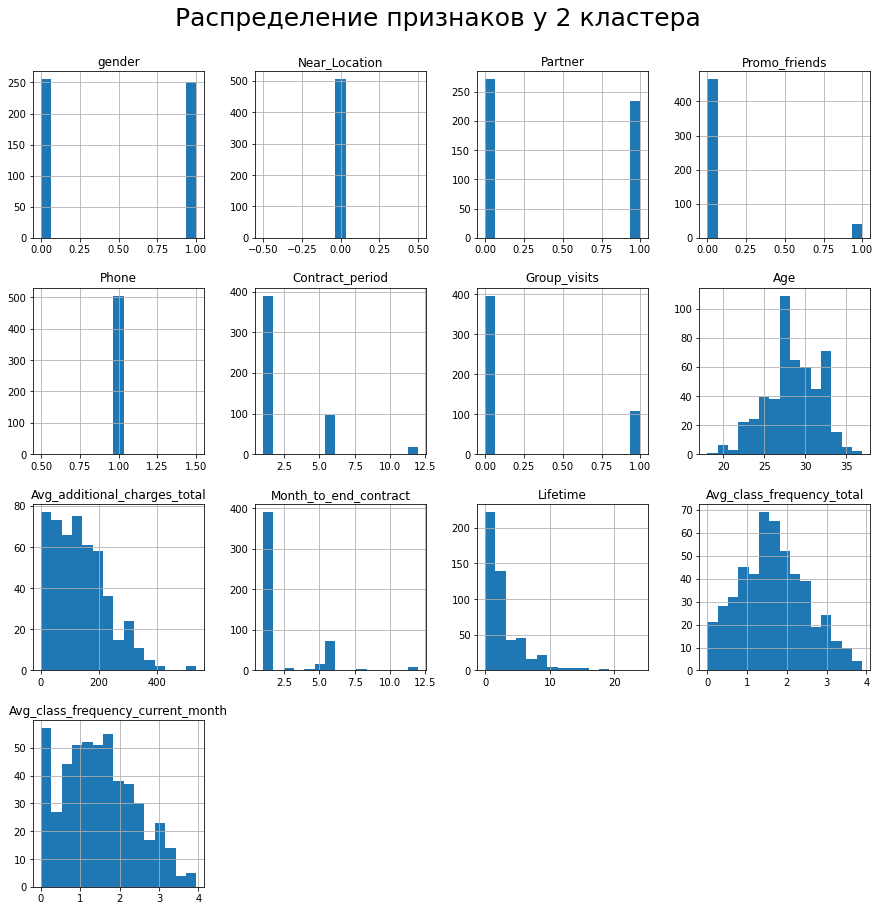

In [47]:
cluster_hist(data,2)

__Характеристика кластера:__
- промокод использован  у __всех__;
- примерно у __42%__ срок абонемента 6 месяцев;
- около половины  ходит на групповые занятия;
- Lifetime у некоторых клиентов доходит до __20__ месяцев, однако количество клиентов с более __10__ месяцев незначительно;
- недельное посещение в текущий месяц находится в границах от 0 до 3, нет явного пика.

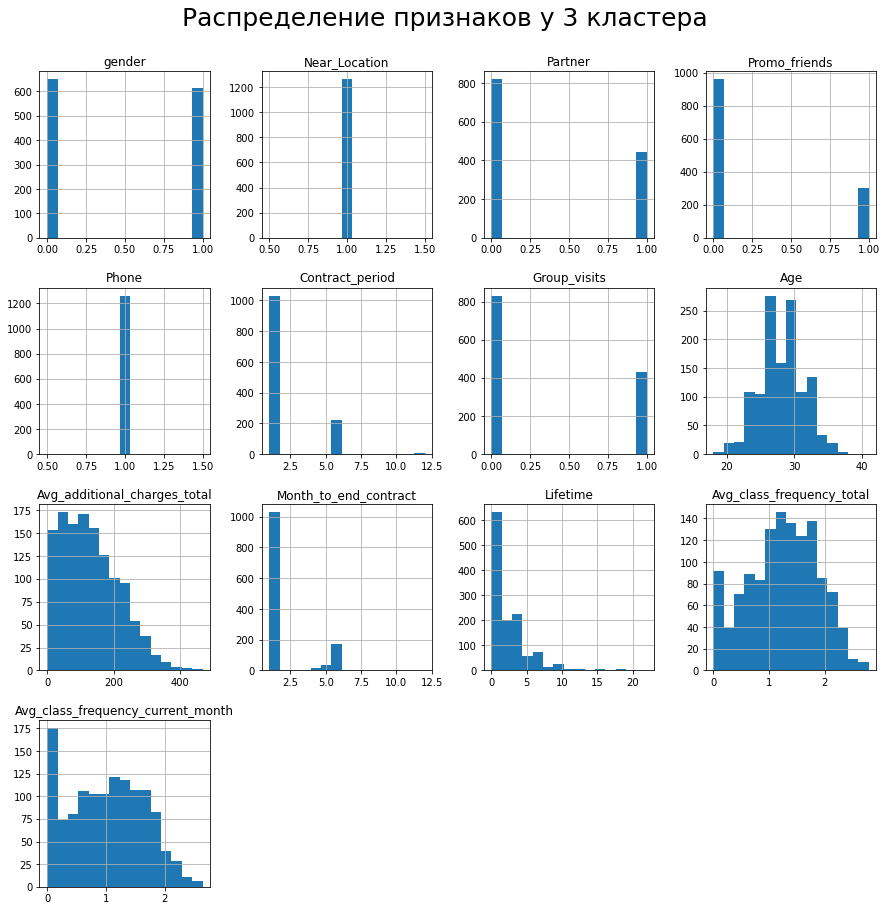

In [48]:
cluster_hist(data,3)

__Характеристика кластера:__
- промокод использован  у ~__50__% кластера;
- практически у всех абонемент сроком на год
- более половины  ходит на групповые занятия;
- Lifetime у некоторых клиентов доходит до __30__ месяцев, большое количество посещает более полугода;
- большинство посещало от __1__ до __3__ раз, однако есть клиенты, которые посещали и более 4 раз в неделю в этом месяце.

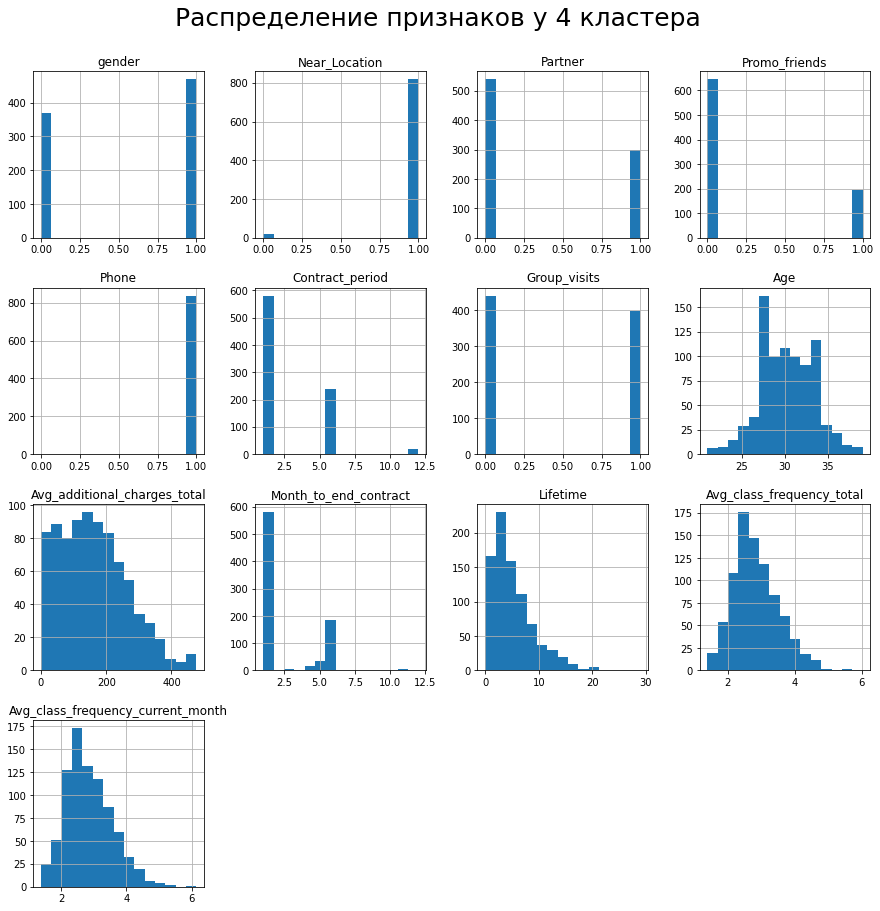

In [49]:
cluster_hist(data,4)

__Характеристика кластера:__
- промокод использован лишь у незначительной доли кластера;
- примерно у __20%__ срок абонемента 6 месяцев;
- около __1/3__  ходит на групповые занятия;
- Lifetime у большинства клиентов составляет не более полугода;
- большое количество клиентов имеют недельную посещаемость близкую к нулю.

### Доля оттока каждого кластера

Исследуем долю оттока у каждого кластера.

In [52]:
cluster_churn=data.groupby('cluster').agg({'Churn':'mean'}).reset_index()
cluster_churn

,cluster,Churn
0,0,0.027723
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068019


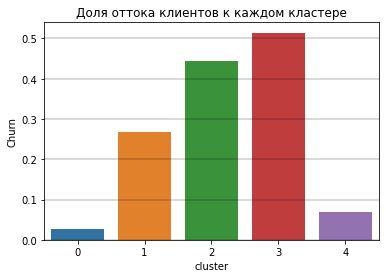

In [57]:
sns.barplot(data=cluster_churn, x='cluster', y='Churn')
plt.grid(color='black', linestyle='-', linewidth=0.3, axis='y')
plt.title('Доля оттока клиентов к каждом кластере')
plt.show()

У __0го__ и __4го__ кластера около половины посетителей переставали быть клиентами фитнес-центра, в то время, как __третий__ кластер показал самый лучший результат (около __2%__ ушедших), а также __первый__ кластер является надеждным (__7%__ оттока).

## Основные выводы и рекомендации

В ходе исследования были сформулированы следующие выводы:
- пол и наличие конткатного телефона не влияют на дальнейший отток клиентов;
- из всех посетителей за предыдудщий месяц процент оттока составил __26.5%__;
- ключевыми признаки, которые больше всего влияют на вероятность оттока:
 - Lifetime;
 - срок абонемента;
 - средняя недельная посещаемость.

Предлагаемые рекомендации для клиентов, которые близки к лояльным (1 кластер):
 - стоит ввести программу лояльности, которая зависит от Lifetime: например, делать скидки старым клиентам на дополнительные услуги;
 - описанная выше программа будет активна в том случае, если средняя недельная посещаемость будет, например, более  __2__ занятий.

Рекомендации для клиентов, у которых высок риск оттока (0 и 4 кластер):
- необходимо предлагать клиенту оформить абонемент на более долгий срок. Для этого стоит сделать цену за годовой абонемент значительно выгоднее остальных периодов;
- сделать более привлекательной акцию "приведи друга", давать бонусы, если привлеченный по промокоду клиент активно посещает центр.